In [ ]:
import tenpy.models.tf_ising as spins
import tenpy.algorithms.dmrg as dmrg
import tenpy.networks.mps as mps
import numpy as np

# Define the TFIM model with appropriate parameters
model_params = {
    "L": 10,               
    "g": 0.8,
    "J": 1,              
    "bc_MPS": "finite",
    "conserve": None
}
model = spins.TFIModel(model_params)

psi = mps.MPS.from_product_state(model.lat.mps_sites(), ['up'] * model.lat.N_sites, bc="finite")

print("Number of sites in MPS:", psi.L)

dmrg_params = {
    "mixer": True,
    "max_E_err": 1e-6,
    "chi_max": 100,
}
info = dmrg.run(psi, model, dmrg_params)


unique_measurements = {}

num_samples = 1000
for _ in range(num_samples):
    
    psi_copy = psi.copy()
    psi_copy.canonical_form()
    sigmas, weight = psi_copy.sample_measurements(first_site=0, last_site=None, complex_amplitude=True)
    outcome = tuple(sigmas)  

    if outcome not in unique_measurements or abs(weight) > abs(unique_measurements[outcome]):
        unique_measurements[outcome] = weight

sorted_measurements = sorted(unique_measurements.items(), key=lambda x: abs(x[1]), reverse=True)

top_measurements = sorted_measurements[:1000]

print("Number of unique basis:", len(top_measurements))

print("Top measurement outcomes:")
for outcome, amp in top_measurements:
    probability = abs(amp)**2
    print("Outcome:", outcome, "Amplitude:", amp, "Probability:", probability)


Number of sites in MPS: 10


c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\tenpy\tools\params.py:232: UserWarning: unused option ['chi_max'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Number of unique basis: 198
Top measurement outcomes:
Outcome: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0) Amplitude: -0.43728012731979293 Probability: 0.19121390974881433
Outcome: (1, 1, 1, 1, 1, 1, 1, 1, 1, 1) Amplitude: -0.4372801273197042 Probability: 0.19121390974873673
Outcome: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1) Amplitude: -0.17746087816139483 Probability: 0.03149236327781342
Outcome: (1, 0, 0, 0, 0, 0, 0, 0, 0, 0) Amplitude: -0.1774608781613877 Probability: 0.03149236327781089
Outcome: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1) Amplitude: -0.1774608781613518 Probability: 0.031492363277798155
Outcome: (1, 1, 1, 1, 1, 1, 1, 1, 1, 0) Amplitude: -0.17746087816135175 Probability: 0.031492363277798134
Outcome: (1, 1, 0, 0, 0, 0, 0, 0, 0, 0) Amplitude: -0.11133667486581057 Probability: 0.012395855170175215
Outcome: (0, 0, 0, 0, 0, 0, 0, 0, 1, 1) Amplitude: -0.11133667486580995 Probability: 0.012395855170175076
Outcome: (1, 1, 1, 1, 1, 1, 1, 1, 0, 0) Amplitude: -0.1113366748657901 Probability: 0.012395855170170658


Number of sites in MPS: 25


c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\tenpy\tools\params.py:232: UserWarning: unused option ['chi_max'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Number of unique basis in original training set: 917

Iteration 1
RBM Epoch 1/40 completed.
RBM Epoch 2/40 completed.
RBM Epoch 3/40 completed.
RBM Epoch 4/40 completed.
RBM Epoch 5/40 completed.
RBM Epoch 6/40 completed.
RBM Epoch 7/40 completed.
RBM Epoch 8/40 completed.
RBM Epoch 9/40 completed.
RBM Epoch 10/40 completed.
RBM Epoch 11/40 completed.
RBM Epoch 12/40 completed.
RBM Epoch 13/40 completed.
RBM Epoch 14/40 completed.
RBM Epoch 15/40 completed.
RBM Epoch 16/40 completed.
RBM Epoch 17/40 completed.
RBM Epoch 18/40 completed.
RBM Epoch 19/40 completed.
RBM Epoch 20/40 completed.
RBM Epoch 21/40 completed.
RBM Epoch 22/40 completed.
RBM Epoch 23/40 completed.
RBM Epoch 24/40 completed.
RBM Epoch 25/40 completed.
RBM Epoch 26/40 completed.
RBM Epoch 27/40 completed.
RBM Epoch 28/40 completed.
RBM Epoch 29/40 completed.
RBM Epoch 30/40 completed.
RBM Epoch 31/40 completed.
RBM Epoch 32/40 completed.
RBM Epoch 33/40 completed.
RBM Epoch 34/40 completed.
RBM Epoch 35/40 completed

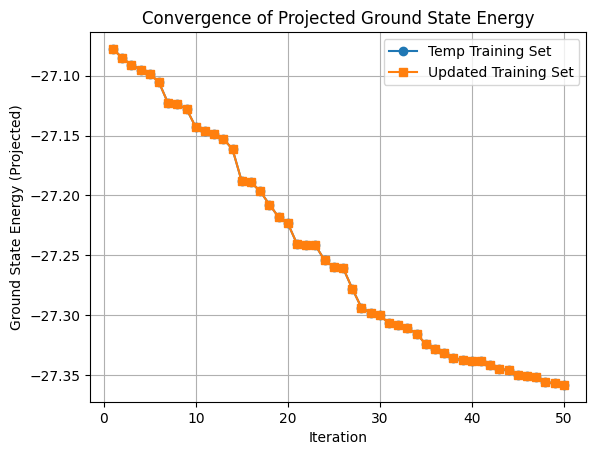

In [ ]:
import tenpy.models.tf_ising as spins
import tenpy.algorithms.dmrg as dmrg
import tenpy.networks.mps as mps
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Build TFIM Model and Optimize via DMRG
# ---------------------------
# Define the TFIM model parameters
model_params = {
    "L": 25,           
    "g": 0.8,
    "J": 1.0,
    "bc_MPS": "finite",
    "conserve": None
}
model = spins.TFIModel(model_params)

psi = mps.MPS.from_product_state(model.lat.mps_sites(), ['up'] * model.lat.N_sites, bc="finite")
print("Number of sites in MPS:", psi.L)

dmrg_params = {
    "mixer": True,
    "max_E_err": 1e-6,
    "chi_max": 100,
}
info = dmrg.run(psi, model, dmrg_params)

# ---------------------------
# 2. Create the Original Training Set from MPS Sampling
# ---------------------------
unique_measurements = {}
num_samples = 2000
for _ in range(num_samples):
    psi_copy = psi.copy()  
    psi_copy.canonical_form()
    sigmas, weight = psi_copy.sample_measurements(first_site=0, last_site=None, complex_amplitude=True)
    outcome = tuple(sigmas)
    if outcome not in unique_measurements or abs(weight) > abs(unique_measurements[outcome]):
        unique_measurements[outcome] = weight

# Sort outcomes by absolute amplitude in decreasing order.
sorted_measurements = sorted(unique_measurements.items(), key=lambda x: abs(x[1]), reverse=True)
# Select top 1000 (or fewer if not available)
top_measurements = sorted_measurements[:1000]
print("Number of unique basis in original training set:", len(top_measurements))

# Convert the training set (list of tuples) into a NumPy array
initial_training_set = [np.array(basis) for basis, amp in top_measurements]
train_data = np.array(initial_training_set, dtype=np.float32)

# ---------------------------
# 3. Define a Simple RBM in NumPy
# ---------------------------
class RBM:
    def __init__(self, n_visible, n_hidden):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = np.random.randn(n_visible, n_hidden) * 0.01
        self.a = np.zeros(n_visible)
        self.b = np.zeros(n_hidden)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def sample_hidden(self, v):
        prob_h = self.sigmoid(np.dot(v, self.W) + self.b)
        h = (np.random.rand(self.n_hidden) < prob_h).astype(np.float32)
        return h, prob_h
    
    def sample_visible(self, h):
        prob_v = self.sigmoid(np.dot(self.W, h) + self.a)
        v = (np.random.rand(self.n_visible) < prob_v).astype(np.float32)
        return v, prob_v

    def cd_step(self, v0, k=20):
        v = v0.copy()
        for _ in range(k):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def train(self, training_data, epochs=20, lr=0.01, k=20, minibatch_size=10):
        N = training_data.shape[0]
        for epoch in range(epochs):
            np.random.shuffle(training_data)
            for i in range(0, N, minibatch_size):
                batch = training_data[i:i+minibatch_size]
                # Positive phase
                pos_hidden_probs = self.sigmoid(np.dot(batch, self.W) + self.b)
                pos_assoc = np.dot(batch.T, pos_hidden_probs)
                # Negative phase: for each sample in batch, run k Gibbs steps
                v_neg = np.zeros_like(batch)
                neg_hidden_probs = np.zeros((batch.shape[0], self.n_hidden))
                for j in range(batch.shape[0]):
                    v_sample = self.cd_step(batch[j], k=k)
                    v_neg[j] = v_sample
                    neg_hidden_probs[j] = self.sigmoid(np.dot(v_sample, self.W) + self.b)
                neg_assoc = np.dot(v_neg.T, neg_hidden_probs)
                # Update parameters
                self.a += lr * np.mean(batch - v_neg, axis=0)
                self.b += lr * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)
                self.W += lr * ((pos_assoc - neg_assoc) / minibatch_size)
            print(f"RBM Epoch {epoch+1}/{epochs} completed.")

    def gibbs_sample(self, v_init, L=1):
        v = v_init.copy()
        for _ in range(L):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def sample(self, n_samples, L=1):
        samples = []
        for _ in range(n_samples):
            v_init = (np.random.rand(self.n_visible) < 0.5).astype(np.float32)
            v_sample = self.gibbs_sample(v_init, L=L)
            samples.append(v_sample)
        return np.array(samples)

# ---------------------------
# 4. Helper Functions for Training Set and Hamiltonian Projection
# ---------------------------
def to_tuple(v):
    return tuple(v.astype(int))

def project_hamiltonian(basis_set, J, g):
    """Project Hamiltonian onto the subspace spanned by basis_set.
       basis_set: list of numpy arrays (each binary vector)."""
    n_basis = len(basis_set)
    H = np.zeros((n_basis, n_basis))
    L = basis_set[0].shape[0]
    def hamiltonian_element(v, w, J, g):
        if np.array_equal(v, w):
            diag = 0.0
            for i in range(L-1):
                diag += (2*v[i]-1) * (2*v[i+1]-1)
            return -J * diag
        else:
            diff = np.abs(v - w)
            if np.sum(diff) == 1:
                return -g
            else:
                return 0.0
    for i in range(n_basis):
        for j in range(n_basis):
            H[i, j] = hamiltonian_element(basis_set[i], basis_set[j], J, g)
    return H

def update_training_set(original_set, new_samples, top_n=15):
    """Select top_n new unique basis states from new_samples (ranking here by sum of bits as a proxy)
       that are not in original_set. Returns updated training set (list of tuples)."""
    original = set(original_set)
    new_unique = {}
    for v in new_samples:
        t = to_tuple(v)
        if t not in original:
            new_unique[t] = np.sum(v)  # Replace with appropriate weight if available
    sorted_new = sorted(new_unique.items(), key=lambda x: x[1], reverse=True)
    top_new = [item[0] for item in sorted_new[:top_n]]
    updated = list(original.union(set(top_new)))
    return updated

# ---------------------------
# 5. Main Iterative Pipeline
# ---------------------------
def main_pipeline(data, num_iterations=5, rbm_epochs=20, rbm_lr=0.01, cd_k=20):
    # Hamiltonian parameters for TFIM (must be consistent with model_params above)
    J = 1.0
    g = 0.8
    L = 25  # number of spins

    # Use the original training set from MPS sampling (converted earlier)
    # training_set is a list of tuples
    training_set = [to_tuple(v) for v in data]
    
    # Initialize list to track ground state energies for both temporary and updated training sets
    gs_energies_temp = []      # from the temp training set (union of current set and all new unique samples)
    gs_energies_updated = []   # from the updated training set (after adding top new basis states)
    
    # Instantiate RBM (choose hidden dimension)
    rbm = RBM(n_visible=L, n_hidden=128)

    for iteration in range(num_iterations):
        print(f"\nIteration {iteration+1}")

        # Train the RBM on the current training data for rbm_epochs epochs
        rbm.train(data, epochs=rbm_epochs, lr=rbm_lr, k=cd_k, minibatch_size=5)

        # Sample 10,000 new vectors from the trained RBM using Gibbs sampling with L=1
        new_samples = rbm.sample(n_samples=1500, L=1)

        # Filter out samples that are already in the current training set
        current_set = set(training_set)
        new_unique_samples = []
        for v in new_samples:
            t = to_tuple(v)
            if t not in current_set:
                new_unique_samples.append(v)
        new_unique_samples = np.array(new_unique_samples)
        print("Number of new unique samples:", len(new_unique_samples))

        # Create a temporary training set: union of current training set and new unique samples
        temp_training_set = list(current_set)
        for v in new_unique_samples:
            t = to_tuple(v)
            if t not in temp_training_set:
                temp_training_set.append(t)
        print("Temporary training set size:", len(temp_training_set))
        
        # Project Hamiltonian onto subspace spanned by temp_training_set and diagonalize it
        basis_vectors_temp = [np.array(v) for v in temp_training_set]
        H_proj_temp = project_hamiltonian(basis_vectors_temp, J, g)
        eigvals_temp, eigvecs_temp = np.linalg.eigh(H_proj_temp)
        gs_energy_temp = np.min(eigvals_temp)
        gs_energies_temp.append(gs_energy_temp)
        print("Projected ground state energy (temp set):", gs_energy_temp)

        new_basis = []
        for idx, v in enumerate(temp_training_set):
            if v not in current_set:
                # Here we use the square of the corresponding component in the eigenvector corresponding to the ground state.
                # Find the index corresponding to the ground state in the eigenvector.
                gs_index = np.argmin(eigvals_temp)
                weight_sq = np.abs(eigvecs_temp[idx, gs_index])**2
                new_basis.append((v, weight_sq))
        new_basis_sorted = sorted(new_basis, key=lambda x: x[1], reverse=True)
        top_new = [item[0] for item in new_basis_sorted[:20]]
        print("New basis states selected (top new):", top_new)

        # Now, form the updated training set (updated training set is the union of current_set and top_new)
        updated_training_set = list(current_set.union(set(top_new)))
        # Project the Hamiltonian onto the subspace spanned by the updated training set and diagonalize it
        basis_vectors_updated = [np.array(v) for v in updated_training_set]
        H_proj_updated = project_hamiltonian(basis_vectors_updated, J, g)
        eigvals_updated, eigvecs_updated = np.linalg.eigh(H_proj_updated)
        gs_energy_updated = np.min(eigvals_updated)
        gs_energies_updated.append(gs_energy_updated)
        print("Projected ground state energy (updated set):", gs_energy_updated)
        
        # Update training_set and train_data for the next iteration
        training_set = updated_training_set
        train_data = np.array([np.array(v) for v in training_set], dtype=np.float32)
        print("Updated training set size:", len(training_set))
    
    # Plot the convergence of ground state energy for both temp and updated training sets
    iterations = np.arange(1, num_iterations+1)
    plt.figure()
    plt.plot(iterations, gs_energies_temp, marker='o', label="Temp Training Set")
    plt.plot(iterations, gs_energies_updated, marker='s', label="Updated Training Set")
    plt.xlabel("Iteration")
    plt.ylabel("Ground State Energy (Projected)")
    plt.title("Convergence of Projected Ground State Energy")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main_pipeline(data = train_data, num_iterations=50, rbm_epochs=40, rbm_lr=0.01, cd_k=15)



# 25-Spin Chain TFIM with Optimal Starting Guess for Ground State (J=1, g=0.8)

Number of sites in MPS: 25


c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\tenpy\tools\params.py:232: UserWarning: unused option ['chi_max'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Ground state energy from DMRG: -28.5518460906613
Number of unique basis in original training set: 899

Iteration 1
RBM Epoch 1/50 completed.
RBM Epoch 2/50 completed.
RBM Epoch 3/50 completed.
RBM Epoch 4/50 completed.
RBM Epoch 5/50 completed.
RBM Epoch 6/50 completed.
RBM Epoch 7/50 completed.
RBM Epoch 8/50 completed.
RBM Epoch 9/50 completed.
RBM Epoch 10/50 completed.
RBM Epoch 11/50 completed.
RBM Epoch 12/50 completed.
RBM Epoch 13/50 completed.
RBM Epoch 14/50 completed.
RBM Epoch 15/50 completed.
RBM Epoch 16/50 completed.
RBM Epoch 17/50 completed.
RBM Epoch 18/50 completed.
RBM Epoch 19/50 completed.
RBM Epoch 20/50 completed.
RBM Epoch 21/50 completed.
RBM Epoch 22/50 completed.
RBM Epoch 23/50 completed.
RBM Epoch 24/50 completed.
RBM Epoch 25/50 completed.
RBM Epoch 26/50 completed.
RBM Epoch 27/50 completed.
RBM Epoch 28/50 completed.
RBM Epoch 29/50 completed.
RBM Epoch 30/50 completed.
RBM Epoch 31/50 completed.
RBM Epoch 32/50 completed.
RBM Epoch 33/50 completed.
RBM

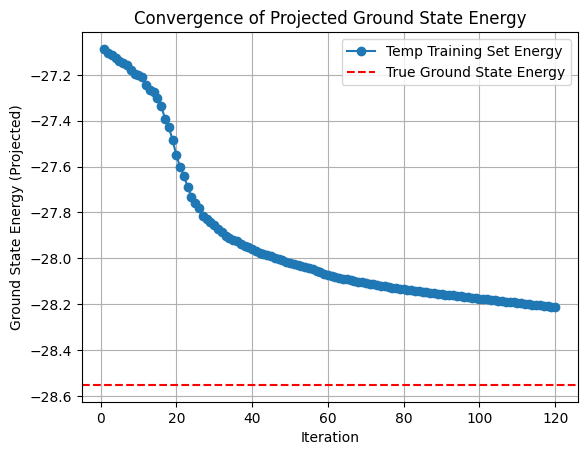

In [ ]:
import tenpy.models.tf_ising as spins
import tenpy.algorithms.dmrg as dmrg
import tenpy.networks.mps as mps
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Build TFIM Model and Optimize via DMRG
# ---------------------------
# Define the TFIM model parameters
model_params = {
    "L": 25,             # number of spins
    "g": 0.8,
    "J": 1.0,
    "bc_MPS": "finite",
    "conserve": None
}
model = spins.TFIModel(model_params)

psi = mps.MPS.from_product_state(model.lat.mps_sites(), ['up'] * model.lat.N_sites, bc="finite")
print("Number of sites in MPS:", psi.L)

dmrg_params = {
    "mixer": True,
    "max_E_err": 1e-6,
    "chi_max": 100,
}
info = dmrg.run(psi, model, dmrg_params)
print("Ground state energy from DMRG:", info['E'])

# ---------------------------
# 2. Create the Original Training Set from MPS Sampling
# ---------------------------
unique_measurements = {}
num_samples = 2000
for _ in range(num_samples):
    psi_copy = psi.copy()
    psi_copy.canonical_form()
    sigmas, weight = psi_copy.sample_measurements(first_site=0, last_site=None, complex_amplitude=True)
    outcome = tuple(sigmas)
    if outcome not in unique_measurements or abs(weight) > abs(unique_measurements[outcome]):
        unique_measurements[outcome] = weight

# Sort outcomes by absolute amplitude in decreasing order.
sorted_measurements = sorted(unique_measurements.items(), key=lambda x: abs(x[1]), reverse=True)
# Select top 1000 (or fewer if not available)
top_measurements = sorted_measurements[:1000]
print("Number of unique basis in original training set:", len(top_measurements))

# Convert training set (list of tuples) into a NumPy array of basis vectors.
initial_training_set = [np.array(basis) for basis, amp in top_measurements]
train_data = np.array(initial_training_set, dtype=np.float32)

# ---------------------------
# 3. Define a Simple RBM in NumPy
# ---------------------------
class RBM:
    def __init__(self, n_visible, n_hidden):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = np.random.randn(n_visible, n_hidden) * 0.01
        self.a = np.zeros(n_visible)
        self.b = np.zeros(n_hidden)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def sample_hidden(self, v):
        prob_h = self.sigmoid(np.dot(v, self.W) + self.b)
        h = (np.random.rand(self.n_hidden) < prob_h).astype(np.float32)
        return h, prob_h
    
    def sample_visible(self, h):
        prob_v = self.sigmoid(np.dot(self.W, h) + self.a)
        v = (np.random.rand(self.n_visible) < prob_v).astype(np.float32)
        return v, prob_v

    def cd_step(self, v0, k=20):
        v = v0.copy()
        for _ in range(k):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def train(self, training_data, epochs=20, lr=0.01, k=20, minibatch_size=10):
        N = training_data.shape[0]
        for epoch in range(epochs):
            np.random.shuffle(training_data)
            for i in range(0, N, minibatch_size):
                batch = training_data[i:i+minibatch_size]
                # Positive phase: compute hidden probabilities from the data
                pos_hidden_probs = self.sigmoid(np.dot(batch, self.W) + self.b)
                pos_assoc = np.dot(batch.T, pos_hidden_probs)
                # Negative phase: run k Gibbs sampling steps from each sample
                v_neg = np.zeros_like(batch)
                neg_hidden_probs = np.zeros((batch.shape[0], self.n_hidden))
                for j in range(batch.shape[0]):
                    v_sample = self.cd_step(batch[j], k=k)
                    v_neg[j] = v_sample
                    neg_hidden_probs[j] = self.sigmoid(np.dot(v_sample, self.W) + self.b)
                neg_assoc = np.dot(v_neg.T, neg_hidden_probs)
                # Update visible bias, hidden bias, and weights
                self.a += lr * np.mean(batch - v_neg, axis=0)
                self.b += lr * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)
                self.W += lr * ((pos_assoc - neg_assoc) / minibatch_size)
            print(f"RBM Epoch {epoch+1}/{epochs} completed.")

    def gibbs_sample(self, v_init, L=1):
        v = v_init.copy()
        for _ in range(L):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def sample(self, n_samples, L=1):
        samples = []
        for _ in range(n_samples):
            v_init = (np.random.rand(self.n_visible) < 0.5).astype(np.float32)
            v_sample = self.gibbs_sample(v_init, L=L)
            samples.append(v_sample)
        return np.array(samples)

# ---------------------------
# 4. Helper Functions for Training Set and Hamiltonian Projection
# ---------------------------
def to_tuple(v):
    return tuple(v.astype(int))

def project_hamiltonian(basis_set, J, g):
    """Project Hamiltonian onto the subspace spanned by basis_set.
       Each basis state is a binary vector of length L."""
    n_basis = len(basis_set)
    H = np.zeros((n_basis, n_basis))
    L = basis_set[0].shape[0]
    def hamiltonian_element(v, w, J, g):
        if np.array_equal(v, w):
            diag = 0.0
            for i in range(L-1):
                diag += (2*v[i]-1) * (2*v[i+1]-1)
            return -J * diag
        else:
            diff = np.abs(v - w)
            if np.sum(diff) == 1:
                return -g
            else:
                return 0.0
    for i in range(n_basis):
        for j in range(n_basis):
            H[i, j] = hamiltonian_element(basis_set[i], basis_set[j], J, g)
    return H

# ---------------------------
# 5. Main Iterative Pipeline (Updated Training Set Update)
# ---------------------------
def main_pipeline(data, num_iterations=5, rbm_epochs=20, rbm_lr=0.01, cd_k=20):
    # Hamiltonian parameters for TFIM (consistent with model_params above)
    J = 1.0
    g = 0.8
    L = 25  # number of spins

    # The original training set from MPS sampling, as a list of tuples.
    training_set = [to_tuple(v) for v in data]
    
    # Lists to record ground state energies for two projections:
    gs_energies_temp = []      # Projected energy from the temporary training set.
    gs_energies_updated = []   # Projected energy from the updated training set.
    
    # Instantiate RBM (using n_visible = L and a chosen hidden dimension, e.g. 128)
    rbm = RBM(n_visible=L, n_hidden=128)

    for iteration in range(num_iterations):
        print(f"\nIteration {iteration+1}")
        
        # Train the RBM on the current training data
        rbm.train(data, epochs=rbm_epochs, lr=rbm_lr, k=cd_k, minibatch_size=5)

        # Sample new vectors from the trained RBM using Gibbs sampling (L=1)
        new_samples = rbm.sample(n_samples=1400, L=1)
        
        # Filter out samples that already exist in the current training set
        current_set = set(training_set)
        new_unique_samples = []
        for v in new_samples:
            t = to_tuple(v)
            if t not in current_set:
                new_unique_samples.append(v)
        new_unique_samples = np.array(new_unique_samples)
        print("Number of new unique samples:", len(new_unique_samples))
        
        # Form temporary training set: union of current training set and new unique samples
        temp_training_set = list(current_set)
        for v in new_unique_samples:
            t = to_tuple(v)
            if t not in temp_training_set:
                temp_training_set.append(t)
        print("Temporary training set size:", len(temp_training_set))
        
        # Project Hamiltonian onto the subspace spanned by the temporary training set and diagonalize
        basis_vectors_temp = [np.array(v) for v in temp_training_set]
        H_proj_temp = project_hamiltonian(basis_vectors_temp, J, g)
        eigvals_temp, eigvecs_temp = np.linalg.eigh(H_proj_temp)
        gs_energy_temp = np.min(eigvals_temp)
        gs_energies_temp.append(gs_energy_temp)
        print("Projected ground state energy (temp set):", gs_energy_temp)
        
        # --- Updated Training Set Update Criterion ---

        gs_index = np.argmin(eigvals_temp)
        # Create a list of tuples (basis, weight_sq) for each basis vector in the temporary training set.
        basis_with_weights = []
        for idx, v in enumerate(temp_training_set):
            weight_sq = np.abs(eigvecs_temp[idx, gs_index])**2
            basis_with_weights.append((v, weight_sq))
        # Sort the entire temporary training set by decreasing weight
        basis_sorted = sorted(basis_with_weights, key=lambda x: x[1], reverse=True)
        # Let n be the size of the training set used in this iteration (current_set size)
        n = len(current_set)
        m = int(np.ceil(1.0175 * n))  # new training set size
        updated_training_set = [item[0] for item in basis_sorted[:m]]
        print("Updated training set size (new set):", len(updated_training_set))
        
        # Update training_set and data for next iteration
        training_set = updated_training_set
        data = np.array([np.array(v) for v in training_set], dtype=np.float32)
    
    # Plot ground state energies for both projections versus iteration
    iterations = np.arange(1, num_iterations+1)
    plt.figure()
    plt.plot(iterations, gs_energies_temp, marker='o', label="Temp Training Set Energy")
    #plt.plot(iterations, gs_energies_updated, marker='s', label="Updated Training Set Energy")
    
    plt.axhline(y=info['E'], color='r', linestyle='--', label='True Ground State Energy')
    
    plt.xlabel("Iteration")
    plt.ylabel("Ground State Energy (Projected)")
    plt.title("Convergence of Projected Ground State Energy")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Use the original training set 'train_data' created from MPS sampling.
    main_pipeline(data=train_data, num_iterations=120, rbm_epochs=50, rbm_lr=0.01, cd_k=20)


# 25-Spin Chain TFIM with Optimal Starting Guess for Ground State

Number of sites in MPS: 25


c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\tenpy\tools\params.py:232: UserWarning: unused option ['chi_max'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Ground state energy from DMRG: -25.092132035672066
Number of unique basis in original training set: 121

Iteration 1
RBM Epoch 1/50 completed.
RBM Epoch 2/50 completed.
RBM Epoch 3/50 completed.
RBM Epoch 4/50 completed.
RBM Epoch 5/50 completed.
RBM Epoch 6/50 completed.
RBM Epoch 7/50 completed.
RBM Epoch 8/50 completed.
RBM Epoch 9/50 completed.
RBM Epoch 10/50 completed.
RBM Epoch 11/50 completed.
RBM Epoch 12/50 completed.
RBM Epoch 13/50 completed.
RBM Epoch 14/50 completed.
RBM Epoch 15/50 completed.
RBM Epoch 16/50 completed.
RBM Epoch 17/50 completed.
RBM Epoch 18/50 completed.
RBM Epoch 19/50 completed.
RBM Epoch 20/50 completed.
RBM Epoch 21/50 completed.
RBM Epoch 22/50 completed.
RBM Epoch 23/50 completed.
RBM Epoch 24/50 completed.
RBM Epoch 25/50 completed.
RBM Epoch 26/50 completed.
RBM Epoch 27/50 completed.
RBM Epoch 28/50 completed.
RBM Epoch 29/50 completed.
RBM Epoch 30/50 completed.
RBM Epoch 31/50 completed.
RBM Epoch 32/50 completed.
RBM Epoch 33/50 completed.
R

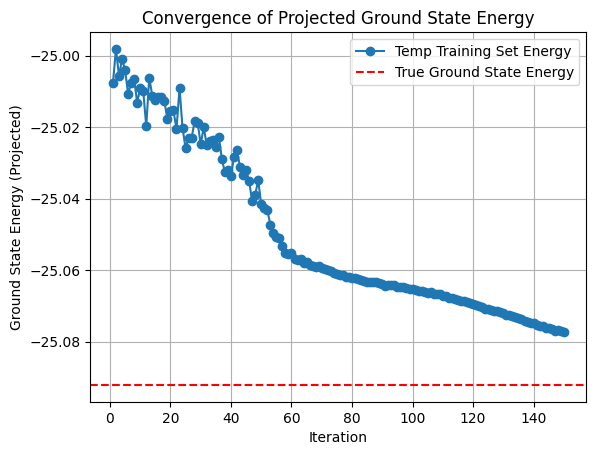

In [ ]:
import tenpy.models.tf_ising as spins
import tenpy.algorithms.dmrg as dmrg
import tenpy.networks.mps as mps
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Build TFIM Model and Optimize via DMRG
# ---------------------------
# Define the TFIM model parameters
model_params = {
    "L": 25,             # number of spins
    "g": 0.4,
    "J": 1.0,
    "bc_MPS": "finite",
    "conserve": None
}
model = spins.TFIModel(model_params)

psi = mps.MPS.from_product_state(model.lat.mps_sites(), ['up'] * model.lat.N_sites, bc="finite")
print("Number of sites in MPS:", psi.L)

dmrg_params = {
    "mixer": True,
    "max_E_err": 1e-6,
    "chi_max": 100,
}
info = dmrg.run(psi, model, dmrg_params)
print("Ground state energy from DMRG:", info['E'])

# ---------------------------
# 2. Create the Original Training Set from MPS Sampling
# ---------------------------
unique_measurements = {}
num_samples = 2500
for _ in range(num_samples):
    psi_copy = psi.copy()
    psi_copy.canonical_form()
    sigmas, weight = psi_copy.sample_measurements(first_site=0, last_site=None, complex_amplitude=True)
    outcome = tuple(sigmas)
    if outcome not in unique_measurements or abs(weight) > abs(unique_measurements[outcome]):
        unique_measurements[outcome] = weight

# Sort outcomes by absolute amplitude in decreasing order.
sorted_measurements = sorted(unique_measurements.items(), key=lambda x: abs(x[1]), reverse=True)
# Select top 1000 (or fewer if not available)
top_measurements = sorted_measurements[:1000]
print("Number of unique basis in original training set:", len(top_measurements))

# Convert training set (list of tuples) into a NumPy array of basis vectors.
initial_training_set = [np.array(basis) for basis, amp in top_measurements]
train_data = np.array(initial_training_set, dtype=np.float32)

# ---------------------------
# 3. Define a Simple RBM in NumPy
# ---------------------------
class RBM:
    def __init__(self, n_visible, n_hidden):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = np.random.randn(n_visible, n_hidden) * 0.01
        self.a = np.zeros(n_visible)
        self.b = np.zeros(n_hidden)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def sample_hidden(self, v):
        prob_h = self.sigmoid(np.dot(v, self.W) + self.b)
        h = (np.random.rand(self.n_hidden) < prob_h).astype(np.float32)
        return h, prob_h
    
    def sample_visible(self, h):
        prob_v = self.sigmoid(np.dot(self.W, h) + self.a)
        v = (np.random.rand(self.n_visible) < prob_v).astype(np.float32)
        return v, prob_v

    def cd_step(self, v0, k=20):
        v = v0.copy()
        for _ in range(k):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def train(self, training_data, epochs=20, lr=0.01, k=20, minibatch_size=10):
        N = training_data.shape[0]
        for epoch in range(epochs):
            np.random.shuffle(training_data)
            for i in range(0, N, minibatch_size):
                batch = training_data[i:i+minibatch_size]
                # Positive phase: compute hidden probabilities from the data
                pos_hidden_probs = self.sigmoid(np.dot(batch, self.W) + self.b)
                pos_assoc = np.dot(batch.T, pos_hidden_probs)
                # Negative phase: run k Gibbs sampling steps from each sample
                v_neg = np.zeros_like(batch)
                neg_hidden_probs = np.zeros((batch.shape[0], self.n_hidden))
                for j in range(batch.shape[0]):
                    v_sample = self.cd_step(batch[j], k=k)
                    v_neg[j] = v_sample
                    neg_hidden_probs[j] = self.sigmoid(np.dot(v_sample, self.W) + self.b)
                neg_assoc = np.dot(v_neg.T, neg_hidden_probs)
                # Update visible bias, hidden bias, and weights
                self.a += lr * np.mean(batch - v_neg, axis=0)
                self.b += lr * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)
                self.W += lr * ((pos_assoc - neg_assoc) / minibatch_size)
            print(f"RBM Epoch {epoch+1}/{epochs} completed.")

    def gibbs_sample(self, v_init, L=1):
        v = v_init.copy()
        for _ in range(L):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def sample(self, n_samples, L=1):
        samples = []
        for _ in range(n_samples):
            v_init = (np.random.rand(self.n_visible) < 0.5).astype(np.float32)
            v_sample = self.gibbs_sample(v_init, L=L)
            samples.append(v_sample)
        return np.array(samples)

# ---------------------------
# 4. Helper Functions for Training Set and Hamiltonian Projection
# ---------------------------
def to_tuple(v):
    return tuple(v.astype(int))

def project_hamiltonian(basis_set, J, g):
    """Project Hamiltonian onto the subspace spanned by basis_set.
       Each basis state is a binary vector of length L."""
    n_basis = len(basis_set)
    H = np.zeros((n_basis, n_basis))
    L = basis_set[0].shape[0]
    def hamiltonian_element(v, w, J, g):
        if np.array_equal(v, w):
            diag = 0.0
            for i in range(L-1):
                diag += (2*v[i]-1) * (2*v[i+1]-1)
            return -J * diag
        else:
            diff = np.abs(v - w)
            if np.sum(diff) == 1:
                return -g
            else:
                return 0.0
    for i in range(n_basis):
        for j in range(n_basis):
            H[i, j] = hamiltonian_element(basis_set[i], basis_set[j], J, g)
    return H

# ---------------------------
# 5. Main Iterative Pipeline (Updated Training Set Update)
# ---------------------------
def main_pipeline(data, num_iterations=5, rbm_epochs=20, rbm_lr=0.01, cd_k=20):
    # Hamiltonian parameters for TFIM (consistent with model_params above)
    J = 1.0
    g = 0.4
    L = 25  # number of spins

    # The original training set from MPS sampling, as a list of tuples.
    training_set = [to_tuple(v) for v in data]
    
    # Lists to record ground state energies for two projections:
    gs_energies_temp = []      # Projected energy from the temporary training set.
    gs_energies_updated = []   # Projected energy from the updated training set.
    
    # Instantiate RBM (using n_visible = L and a chosen hidden dimension)
    rbm = RBM(n_visible=L, n_hidden=128)

    for iteration in range(num_iterations):
        print(f"\nIteration {iteration+1}")
        
        # Train the RBM on the current training data
        rbm.train(data, epochs=rbm_epochs, lr=rbm_lr, k=cd_k, minibatch_size=5)

        # Sample new vectors from the trained RBM using Gibbs sampling (L=1)
        new_samples = rbm.sample(n_samples=1400, L=1)
        
        # Filter out samples that already exist in the current training set
        current_set = set(training_set)
        new_unique_samples = []
        for v in new_samples:
            t = to_tuple(v)
            if t not in current_set:
                new_unique_samples.append(v)
        new_unique_samples = np.array(new_unique_samples)
        print("Number of new unique samples:", len(new_unique_samples))
        
        # Form temporary training set: union of current training set and new unique samples
        temp_training_set = list(current_set)
        for v in new_unique_samples:
            t = to_tuple(v)
            if t not in temp_training_set:
                temp_training_set.append(t)
        print("Temporary training set size:", len(temp_training_set))
        
        # Project Hamiltonian onto the subspace spanned by the temporary training set and diagonalize
        basis_vectors_temp = [np.array(v) for v in temp_training_set]
        H_proj_temp = project_hamiltonian(basis_vectors_temp, J, g)
        eigvals_temp, eigvecs_temp = np.linalg.eigh(H_proj_temp)
        gs_energy_temp = np.min(eigvals_temp)
        gs_energies_temp.append(gs_energy_temp)
        print("Projected ground state energy (temp set):", gs_energy_temp)
        
        # --- Updated Training Set Update Criterion ---
        gs_index = np.argmin(eigvals_temp)
        # Create a list of tuples (basis, weight_sq) for each basis vector in the temporary training set.
        basis_with_weights = []
        for idx, v in enumerate(temp_training_set):
            weight_sq = np.abs(eigvecs_temp[idx, gs_index])**2
            basis_with_weights.append((v, weight_sq))
        # Sort the entire temporary training set by decreasing weight
        basis_sorted = sorted(basis_with_weights, key=lambda x: x[1], reverse=True)
        # Let n be the size of the training set used in this iteration (current_set size)
        n = len(current_set)
        m = int(np.ceil(1.015 * n))  # new training set size
        updated_training_set = [item[0] for item in basis_sorted[:m]]
        print("Updated training set size (new set):", len(updated_training_set))
        
        # Update training_set and data for next iteration
        training_set = updated_training_set
        data = np.array([np.array(v) for v in training_set], dtype=np.float32)
    
    # Plot ground state energies for both projections versus iteration
    iterations = np.arange(1, num_iterations+1)
    plt.figure()
    plt.plot(iterations, gs_energies_temp, marker='o', label="Temp Training Set Energy")
    #plt.plot(iterations, gs_energies_updated, marker='s', label="Updated Training Set Energy")
    
    plt.axhline(y=info['E'], color='r', linestyle='--', label='True Ground State Energy')
    
    plt.xlabel("Iteration")
    plt.ylabel("Ground State Energy (Projected)")
    plt.title("Convergence of Projected Ground State Energy")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Use the original training set 'train_data' created from MPS sampling.
    main_pipeline(data=train_data, num_iterations=150, rbm_epochs=50, rbm_lr=0.01, cd_k=20)


# 25-Spin Chain TFIM with Bad Starting Guess for Ground State

Number of sites in MPS: 25


c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\tenpy\tools\params.py:232: UserWarning: unused option ['chi_max'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Ground state energy from DMRG: -24.392473461029354
Number of unique basis in original training set: 632

Iteration 1
RBM Epoch 1/50 completed.
RBM Epoch 2/50 completed.
RBM Epoch 3/50 completed.
RBM Epoch 4/50 completed.
RBM Epoch 5/50 completed.
RBM Epoch 6/50 completed.
RBM Epoch 7/50 completed.
RBM Epoch 8/50 completed.
RBM Epoch 9/50 completed.
RBM Epoch 10/50 completed.
RBM Epoch 11/50 completed.
RBM Epoch 12/50 completed.
RBM Epoch 13/50 completed.
RBM Epoch 14/50 completed.
RBM Epoch 15/50 completed.
RBM Epoch 16/50 completed.
RBM Epoch 17/50 completed.
RBM Epoch 18/50 completed.
RBM Epoch 19/50 completed.
RBM Epoch 20/50 completed.
RBM Epoch 21/50 completed.
RBM Epoch 22/50 completed.
RBM Epoch 23/50 completed.
RBM Epoch 24/50 completed.
RBM Epoch 25/50 completed.
RBM Epoch 26/50 completed.
RBM Epoch 27/50 completed.
RBM Epoch 28/50 completed.
RBM Epoch 29/50 completed.
RBM Epoch 30/50 completed.
RBM Epoch 31/50 completed.
RBM Epoch 32/50 completed.
RBM Epoch 33/50 completed.
R

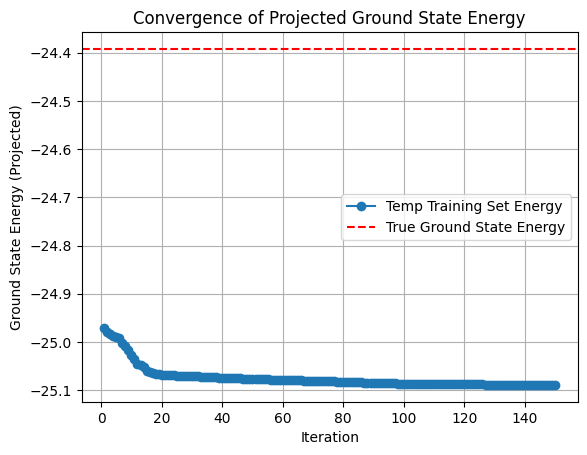

In [ ]:
import tenpy.models.tf_ising as spins
import tenpy.algorithms.dmrg as dmrg
import tenpy.networks.mps as mps
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Build TFIM Model and Optimize via DMRG
# ---------------------------
# Define the TFIM model parameters
model_params = {
    "L": 25,             # number of spins
    "g": 0.6,
    "J": 0.9,
    "bc_MPS": "finite",
    "conserve": None
}
model = spins.TFIModel(model_params)

psi = mps.MPS.from_product_state(model.lat.mps_sites(), ['up'] * model.lat.N_sites, bc="finite")
print("Number of sites in MPS:", psi.L)

dmrg_params = {
    "mixer": True,
    "max_E_err": 1e-6,
    "chi_max": 100,
}
info = dmrg.run(psi, model, dmrg_params)
print("Ground state energy from DMRG:", info['E'])

# ---------------------------
# 2. Create the Original Training Set from MPS Sampling
# ---------------------------
unique_measurements = {}
num_samples = 2500
for _ in range(num_samples):
    psi_copy = psi.copy()
    psi_copy.canonical_form()
    sigmas, weight = psi_copy.sample_measurements(first_site=0, last_site=None, complex_amplitude=True)
    outcome = tuple(sigmas)
    if outcome not in unique_measurements or abs(weight) > abs(unique_measurements[outcome]):
        unique_measurements[outcome] = weight

# Sort outcomes by absolute amplitude in decreasing order.
sorted_measurements = sorted(unique_measurements.items(), key=lambda x: abs(x[1]), reverse=True)
# Select top 1000 (or fewer if not available)
top_measurements = sorted_measurements[:1000]
print("Number of unique basis in original training set:", len(top_measurements))

# Convert training set (list of tuples) into a NumPy array of basis vectors.
initial_training_set = [np.array(basis) for basis, amp in top_measurements]
train_data = np.array(initial_training_set, dtype=np.float32)

# ---------------------------
# 3. Define a Simple RBM in NumPy
# ---------------------------
class RBM:
    def __init__(self, n_visible, n_hidden):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = np.random.randn(n_visible, n_hidden) * 0.01
        self.a = np.zeros(n_visible)
        self.b = np.zeros(n_hidden)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def sample_hidden(self, v):
        prob_h = self.sigmoid(np.dot(v, self.W) + self.b)
        h = (np.random.rand(self.n_hidden) < prob_h).astype(np.float32)
        return h, prob_h
    
    def sample_visible(self, h):
        prob_v = self.sigmoid(np.dot(self.W, h) + self.a)
        v = (np.random.rand(self.n_visible) < prob_v).astype(np.float32)
        return v, prob_v

    def cd_step(self, v0, k=20):
        v = v0.copy()
        for _ in range(k):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def train(self, training_data, epochs=20, lr=0.01, k=20, minibatch_size=10):
        N = training_data.shape[0]
        for epoch in range(epochs):
            np.random.shuffle(training_data)
            for i in range(0, N, minibatch_size):
                batch = training_data[i:i+minibatch_size]
                # Positive phase: compute hidden probabilities from the data
                pos_hidden_probs = self.sigmoid(np.dot(batch, self.W) + self.b)
                pos_assoc = np.dot(batch.T, pos_hidden_probs)
                # Negative phase: run k Gibbs sampling steps from each sample
                v_neg = np.zeros_like(batch)
                neg_hidden_probs = np.zeros((batch.shape[0], self.n_hidden))
                for j in range(batch.shape[0]):
                    v_sample = self.cd_step(batch[j], k=k)
                    v_neg[j] = v_sample
                    neg_hidden_probs[j] = self.sigmoid(np.dot(v_sample, self.W) + self.b)
                neg_assoc = np.dot(v_neg.T, neg_hidden_probs)
                # Update visible bias, hidden bias, and weights
                self.a += lr * np.mean(batch - v_neg, axis=0)
                self.b += lr * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)
                self.W += lr * ((pos_assoc - neg_assoc) / minibatch_size)
            print(f"RBM Epoch {epoch+1}/{epochs} completed.")

    def gibbs_sample(self, v_init, L=1):
        v = v_init.copy()
        for _ in range(L):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def sample(self, n_samples, L=1):
        samples = []
        for _ in range(n_samples):
            v_init = (np.random.rand(self.n_visible) < 0.5).astype(np.float32)
            v_sample = self.gibbs_sample(v_init, L=L)
            samples.append(v_sample)
        return np.array(samples)

# ---------------------------
# 4. Helper Functions for Training Set and Hamiltonian Projection
# ---------------------------
def to_tuple(v):
    return tuple(v.astype(int))

def project_hamiltonian(basis_set, J, g):
    """Project Hamiltonian onto the subspace spanned by basis_set.
       Each basis state is a binary vector of length L."""
    n_basis = len(basis_set)
    H = np.zeros((n_basis, n_basis))
    L = basis_set[0].shape[0]
    def hamiltonian_element(v, w, J, g):
        if np.array_equal(v, w):
            diag = 0.0
            for i in range(L-1):
                diag += (2*v[i]-1) * (2*v[i+1]-1)
            return -J * diag
        else:
            diff = np.abs(v - w)
            if np.sum(diff) == 1:
                return -g
            else:
                return 0.0
    for i in range(n_basis):
        for j in range(n_basis):
            H[i, j] = hamiltonian_element(basis_set[i], basis_set[j], J, g)
    return H

# ---------------------------
# 5. Main Iterative Pipeline (Updated Training Set Update)
# ---------------------------
def main_pipeline(data, num_iterations=5, rbm_epochs=20, rbm_lr=0.01, cd_k=20):
    # Hamiltonian parameters for TFIM (consistent with model_params above)
    J = 1.0
    g = 0.4
    L = 25  # number of spins

    # The original training set from MPS sampling, as a list of tuples.
    training_set = [to_tuple(v) for v in data]
    
    # Lists to record ground state energies for two projections:
    gs_energies_temp = []      # Projected energy from the temporary training set.
    gs_energies_updated = []   # Projected energy from the updated training set.
    
    # Instantiate RBM (using n_visible = L and a chosen hidden dimension)
    rbm = RBM(n_visible=L, n_hidden=128)

    for iteration in range(num_iterations):
        print(f"\nIteration {iteration+1}")
        
        # Train the RBM on the current training data
        rbm.train(data, epochs=rbm_epochs, lr=rbm_lr, k=cd_k, minibatch_size=5)

        # Sample new vectors from the trained RBM using Gibbs sampling (L=1)
        new_samples = rbm.sample(n_samples=1400, L=1)
        
        # Filter out samples that already exist in the current training set
        current_set = set(training_set)
        new_unique_samples = []
        for v in new_samples:
            t = to_tuple(v)
            if t not in current_set:
                new_unique_samples.append(v)
        new_unique_samples = np.array(new_unique_samples)
        print("Number of new unique samples:", len(new_unique_samples))
        
        # Form temporary training set: union of current training set and new unique samples
        temp_training_set = list(current_set)
        for v in new_unique_samples:
            t = to_tuple(v)
            if t not in temp_training_set:
                temp_training_set.append(t)
        print("Temporary training set size:", len(temp_training_set))
        
        # Project Hamiltonian onto the subspace spanned by the temporary training set and diagonalize
        basis_vectors_temp = [np.array(v) for v in temp_training_set]
        H_proj_temp = project_hamiltonian(basis_vectors_temp, J, g)
        eigvals_temp, eigvecs_temp = np.linalg.eigh(H_proj_temp)
        gs_energy_temp = np.min(eigvals_temp)
        gs_energies_temp.append(gs_energy_temp)
        print("Projected ground state energy (temp set):", gs_energy_temp)
        
        # --- Updated Training Set Update Criterion ---

        gs_index = np.argmin(eigvals_temp)
        # Create a list of tuples (basis, weight_sq) for each basis vector in the temporary training set.
        basis_with_weights = []
        for idx, v in enumerate(temp_training_set):
            weight_sq = np.abs(eigvecs_temp[idx, gs_index])**2
            basis_with_weights.append((v, weight_sq))
        # Sort the entire temporary training set by decreasing weight
        basis_sorted = sorted(basis_with_weights, key=lambda x: x[1], reverse=True)
        # Let n be the size of the training set used in this iteration (current_set size)
        n = len(current_set)
        m = int(np.ceil(1.015 * n))  # new training set size
        updated_training_set = [item[0] for item in basis_sorted[:m]]
        print("Updated training set size (new set):", len(updated_training_set))
        
        
        # Update training_set and data for next iteration
        training_set = updated_training_set
        data = np.array([np.array(v) for v in training_set], dtype=np.float32)
    
    # Plot ground state energies for both projections versus iteration
    iterations = np.arange(1, num_iterations+1)
    plt.figure()
    plt.plot(iterations, gs_energies_temp, marker='o', label="Temp Training Set Energy")
    #plt.plot(iterations, gs_energies_updated, marker='s', label="Updated Training Set Energy")
    
    plt.axhline(y=info['E'], color='r', linestyle='--', label='True Ground State Energy')
    
    plt.xlabel("Iteration")
    plt.ylabel("Ground State Energy (Projected)")
    plt.title("Convergence of Projected Ground State Energy")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Use the original training set 'train_data' created from MPS sampling.
    main_pipeline(data=train_data, num_iterations=150, rbm_epochs=50, rbm_lr=0.01, cd_k=20)


# Untrained RBM Test

Number of sites in MPS: 25


c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\tenpy\tools\params.py:232: UserWarning: unused option ['chi_max'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Ground state energy from DMRG: -25.092132035672066
Number of unique basis in original training set: 128

Iteration 1
Number of new unique samples (untrained RBM): 1400
Temporary training set size: 1528
Projected ground state energy (temp set): -24.922596192112298
Updated training set size (new set): 131
Projected ground state energy (updated set): -24.9225961921123

Iteration 2
Number of new unique samples (untrained RBM): 1400
Temporary training set size: 1531
Projected ground state energy (temp set): -24.92259619211229
Updated training set size (new set): 134
Projected ground state energy (updated set): -24.922596192112305

Iteration 3
Number of new unique samples (untrained RBM): 1400
Temporary training set size: 1534
Projected ground state energy (temp set): -24.922596192112284
Updated training set size (new set): 137
Projected ground state energy (updated set): -24.922596192112305

Iteration 4
Number of new unique samples (untrained RBM): 1400
Temporary training set size: 1537
Pro

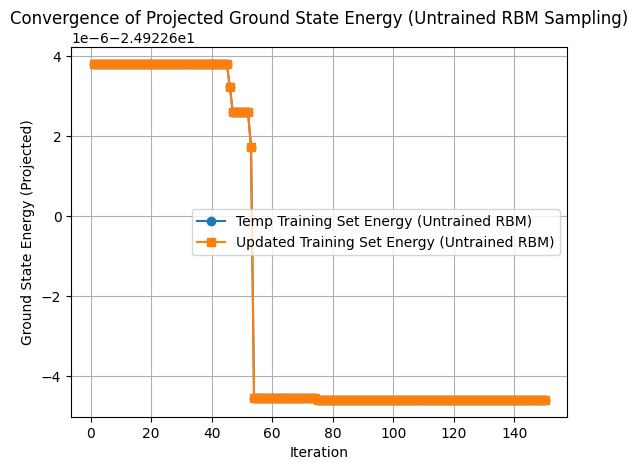

In [ ]:
import tenpy.models.tf_ising as spins
import tenpy.algorithms.dmrg as dmrg
import tenpy.networks.mps as mps
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Build TFIM Model and Optimize via DMRG
# ---------------------------
# Define the TFIM model parameters
model_params = {
    "L": 25,             # number of spins
    "g": 0.4,
    "J": 1.0,
    "bc_MPS": "finite",
    "conserve": None
}
model = spins.TFIModel(model_params)

psi = mps.MPS.from_product_state(model.lat.mps_sites(), ['up'] * model.lat.N_sites, bc="finite")
print("Number of sites in MPS:", psi.L)

dmrg_params = {
    "mixer": True,
    "max_E_err": 1e-6,
    "chi_max": 100,
}
info = dmrg.run(psi, model, dmrg_params)
print("Ground state energy from DMRG:", info['E'])

# ---------------------------
# 2. Create the Original Training Set from MPS Sampling
# ---------------------------
unique_measurements = {}
num_samples = 2500
for _ in range(num_samples):
    psi_copy = psi.copy()
    psi_copy.canonical_form()
    sigmas, weight = psi_copy.sample_measurements(first_site=0, last_site=None, complex_amplitude=True)
    outcome = tuple(sigmas)
    if outcome not in unique_measurements or abs(weight) > abs(unique_measurements[outcome]):
        unique_measurements[outcome] = weight

sorted_measurements = sorted(unique_measurements.items(), key=lambda x: abs(x[1]), reverse=True)
# Select top 1000 (or fewer if not available)
top_measurements = sorted_measurements[:1000]
print("Number of unique basis in original training set:", len(top_measurements))

initial_training_set = [np.array(basis) for basis, amp in top_measurements]
train_data = np.array(initial_training_set, dtype=np.float32)

# ---------------------------
# 3. Define a Simple RBM in NumPy
# ---------------------------
class RBM:
    def __init__(self, n_visible, n_hidden):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = np.random.randn(n_visible, n_hidden) * 0.01
        self.a = np.zeros(n_visible)
        self.b = np.zeros(n_hidden)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def sample_hidden(self, v):
        prob_h = self.sigmoid(np.dot(v, self.W) + self.b)
        h = (np.random.rand(self.n_hidden) < prob_h).astype(np.float32)
        return h, prob_h
    
    def sample_visible(self, h):
        prob_v = self.sigmoid(np.dot(self.W, h) + self.a)
        v = (np.random.rand(self.n_visible) < prob_v).astype(np.float32)
        return v, prob_v

    def cd_step(self, v0, k=1):
        # For the untrained RBM sampling, we use k=1 (CD-1)
        v = v0.copy()
        for _ in range(k):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v
    
    # Note: we do not use the training function in this modified version for the untrained pipeline.
    def sample(self, n_samples, L=1):
        samples = []
        for _ in range(n_samples):
            v_init = (np.random.rand(self.n_visible) < 0.5).astype(np.float32)
            v_sample = self.gibbs_sample(v_init, L=L)
            samples.append(v_sample)
        return np.array(samples)
    
    def gibbs_sample(self, v_init, L=1):
        v = v_init.copy()
        for _ in range(L):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

# ---------------------------
# 4. Helper Functions for Training Set and Hamiltonian Projection
# ---------------------------
def to_tuple(v):
    return tuple(v.astype(int))

def project_hamiltonian(basis_set, J, g):
    n_basis = len(basis_set)
    H = np.zeros((n_basis, n_basis))
    L = basis_set[0].shape[0]
    def hamiltonian_element(v, w, J, g):
        if np.array_equal(v, w):
            diag = 0.0
            for i in range(L-1):
                diag += (2*v[i]-1) * (2*v[i+1]-1)
            return -J * diag
        else:
            diff = np.abs(v - w)
            if np.sum(diff) == 1:
                return -g
            else:
                return 0.0
    for i in range(n_basis):
        for j in range(n_basis):
            H[i, j] = hamiltonian_element(basis_set[i], basis_set[j], J, g)
    return H

# ---------------------------
# 5. Main Iterative Pipeline Using Untrained RBM
# ---------------------------
def main_pipeline(data, num_iterations=5, cd_k=1):
    # Hamiltonian parameters for TFIM (must be consistent with model_params above)
    J = 1.0
    g = 0.4
    L = 25  # number of spins

    # The original training set from MPS sampling as a list of tuples.
    training_set = [to_tuple(v) for v in data]
    
    # List to record ground state energies for the temporary training set.
    gs_energies_temp = []
    gs_energies_updated = []
    
    for iteration in range(num_iterations):
        print(f"\nIteration {iteration+1}")
        
        # For the untrained pipeline, reinitialize an untrained RBM at each iteration.
        rbm_untrained = RBM(n_visible=L, n_hidden=128)
        
        # Using this untrained RBM, sample new vectors via Gibbs sampling (CD-1, i.e. L=1)
        new_samples = rbm_untrained.sample(n_samples=1400, L=1)
        
        # Filter new_samples to get only those not already in the current training set.
        current_set = set(training_set)
        new_unique_samples = []
        for v in new_samples:
            t = to_tuple(v)
            if t not in current_set:
                new_unique_samples.append(v)
        new_unique_samples = np.array(new_unique_samples)
        print("Number of new unique samples (untrained RBM):", len(new_unique_samples))
        
        # Form the temporary training set: union of current training set and new unique samples.
        temp_training_set = list(current_set)
        for v in new_unique_samples:
            t = to_tuple(v)
            if t not in temp_training_set:
                temp_training_set.append(t)
        print("Temporary training set size:", len(temp_training_set))
        
        # Project the Hamiltonian onto the subspace spanned by the temporary training set and diagonalize.
        basis_vectors_temp = [np.array(v) for v in temp_training_set]
        H_proj_temp = project_hamiltonian(basis_vectors_temp, J, g)
        eigvals_temp, eigvecs_temp = np.linalg.eigh(H_proj_temp)
        gs_energy_temp = np.min(eigvals_temp)
        gs_energies_temp.append(gs_energy_temp)
        print("Projected ground state energy (temp set):", gs_energy_temp)
        
        # --- Fully Update Training Set ---

        gs_index = np.argmin(eigvals_temp)
        basis_with_weights = []
        for idx, v in enumerate(temp_training_set):
            weight_sq = np.abs(eigvecs_temp[idx, gs_index])**2
            basis_with_weights.append((v, weight_sq))
        basis_sorted = sorted(basis_with_weights, key=lambda x: x[1], reverse=True)
        n_current = len(current_set)
        m = int(np.ceil(1.02 * n_current))
        updated_training_set = [item[0] for item in basis_sorted[:m]]
        print("Updated training set size (new set):", len(updated_training_set))
        
        # Project Hamiltonian onto updated training set and record its ground state energy.
        basis_vectors_updated = [np.array(v) for v in updated_training_set]
        H_proj_updated = project_hamiltonian(basis_vectors_updated, J, g)
        eigvals_updated, eigvecs_updated = np.linalg.eigh(H_proj_updated)
        gs_energy_updated = np.min(eigvals_updated)
        gs_energies_updated.append(gs_energy_updated)
        print("Projected ground state energy (updated set):", gs_energy_updated)
        
        # Update training set and data for the next iteration.
        training_set = updated_training_set
        data = np.array([np.array(v) for v in training_set], dtype=np.float32)
    
    iterations = np.arange(1, num_iterations+1)
    plt.figure()
    plt.plot(iterations, gs_energies_temp, marker='o', label="Temp Training Set Energy (Untrained RBM)")
    plt.plot(iterations, gs_energies_updated, marker='s', label="Updated Training Set Energy (Untrained RBM)")
    plt.xlabel("Iteration")
    plt.ylabel("Ground State Energy (Projected)")
    plt.title("Convergence of Projected Ground State Energy (Untrained RBM Sampling)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Run the pipeline with the original training set 'train_data'
    main_pipeline(data=train_data, num_iterations=150, cd_k=5)


Number of sites in MPS: 40


c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\tenpy\tools\params.py:232: UserWarning: unused option ['chi_max'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Number of unique basis in original training set: 1000

Iteration 1
RBM Epoch 1/30 completed.
RBM Epoch 2/30 completed.
RBM Epoch 3/30 completed.
RBM Epoch 4/30 completed.
RBM Epoch 5/30 completed.
RBM Epoch 6/30 completed.
RBM Epoch 7/30 completed.
RBM Epoch 8/30 completed.
RBM Epoch 9/30 completed.
RBM Epoch 10/30 completed.
RBM Epoch 11/30 completed.
RBM Epoch 12/30 completed.
RBM Epoch 13/30 completed.
RBM Epoch 14/30 completed.
RBM Epoch 15/30 completed.
RBM Epoch 16/30 completed.
RBM Epoch 17/30 completed.
RBM Epoch 18/30 completed.
RBM Epoch 19/30 completed.
RBM Epoch 20/30 completed.
RBM Epoch 21/30 completed.
RBM Epoch 22/30 completed.
RBM Epoch 23/30 completed.
RBM Epoch 24/30 completed.
RBM Epoch 25/30 completed.
RBM Epoch 26/30 completed.
RBM Epoch 27/30 completed.
RBM Epoch 28/30 completed.
RBM Epoch 29/30 completed.
RBM Epoch 30/30 completed.
Number of new unique samples: 294
Temporary training set size: 1292
Projected ground state energy: -40.17006692362608
New basis stat

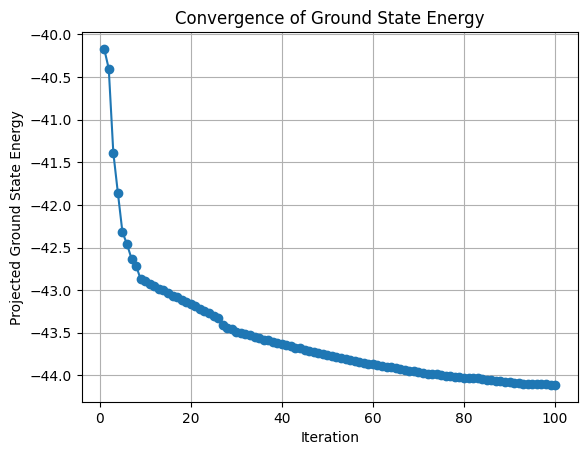

In [ ]:
import tenpy.models.tf_ising as spins
import tenpy.algorithms.dmrg as dmrg
import tenpy.networks.mps as mps
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Build TFIM Model and Optimize via DMRG
# ---------------------------
# Define the TFIM model parameters
model_params = {
    "L": 40,               
    "g": 1.0,
    "J": 0.8,
    "bc_MPS": "finite",
    "conserve": None
}
model = spins.TFIModel(model_params)

psi = mps.MPS.from_product_state(model.lat.mps_sites(), ['up'] * model.lat.N_sites, bc="finite")
print("Number of sites in MPS:", psi.L)

dmrg_params = {
    "mixer": True,
    "max_E_err": 1e-6,
    "chi_max": 100,
}
info = dmrg.run(psi, model, dmrg_params)

# ---------------------------
# 2. Create the Original Training Set from MPS Sampling
# ---------------------------
unique_measurements = {}
num_samples = 5000
for _ in range(num_samples):
    psi_copy = psi.copy()  
    sigmas, weight = psi_copy.sample_measurements(first_site=0, last_site=None, complex_amplitude=True)
    outcome = tuple(sigmas)  # convert list to tuple (for use as dictionary key)
    # Keep the configuration if it's new or if its amplitude is larger (by absolute value)
    if outcome not in unique_measurements or abs(weight) > abs(unique_measurements[outcome]):
        unique_measurements[outcome] = weight

# Sort outcomes by absolute amplitude in decreasing order
sorted_measurements = sorted(unique_measurements.items(), key=lambda x: abs(x[1]), reverse=True)
# Here we take top 1000 (or all if less than 1000)
top_measurements = sorted_measurements[:1000]
print("Number of unique basis in original training set:", len(top_measurements))

# Convert training set (list of tuples) to a numpy array of shape (N_samples, L)
initial_training_set = [np.array(basis) for basis, amp in top_measurements]
train_data = np.array(initial_training_set, dtype=np.float32)

# ---------------------------
# 3. Define a Simple RBM in NumPy
# ---------------------------
class RBM:
    def __init__(self, n_visible, n_hidden):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = np.random.randn(n_visible, n_hidden) * 0.01
        self.a = np.zeros(n_visible)
        self.b = np.zeros(n_hidden)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def sample_hidden(self, v):
        prob_h = self.sigmoid(np.dot(v, self.W) + self.b)
        h = (np.random.rand(self.n_hidden) < prob_h).astype(np.float32)
        return h, prob_h
    
    def sample_visible(self, h):
        prob_v = self.sigmoid(np.dot(self.W, h) + self.a)
        v = (np.random.rand(self.n_visible) < prob_v).astype(np.float32)
        return v, prob_v

    def cd_step(self, v0, k=20):
        v = v0.copy()
        for _ in range(k):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def train(self, training_data, epochs=20, lr=0.01, k=20, minibatch_size=10):
        N = training_data.shape[0]
        for epoch in range(epochs):
            np.random.shuffle(training_data)
            for i in range(0, N, minibatch_size):
                batch = training_data[i:i+minibatch_size]
                # Positive phase
                pos_hidden_probs = self.sigmoid(np.dot(batch, self.W) + self.b)
                pos_assoc = np.dot(batch.T, pos_hidden_probs)
                # Negative phase: run k steps of Gibbs sampling for each sample
                v_neg = np.zeros_like(batch)
                neg_hidden_probs = np.zeros((batch.shape[0], self.n_hidden))
                for j in range(batch.shape[0]):
                    v_sample = self.cd_step(batch[j], k=k)
                    v_neg[j] = v_sample
                    neg_hidden_probs[j] = self.sigmoid(np.dot(v_sample, self.W) + self.b)
                neg_assoc = np.dot(v_neg.T, neg_hidden_probs)
                # Update parameters
                self.a += lr * np.mean(batch - v_neg, axis=0)
                self.b += lr * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)
                self.W += lr * ((pos_assoc - neg_assoc) / minibatch_size)
            print(f"RBM Epoch {epoch+1}/{epochs} completed.")

    def gibbs_sample(self, v_init, L=1):
        v = v_init.copy()
        for _ in range(L):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def sample(self, n_samples, L=1):
        samples = []
        for _ in range(n_samples):
            v_init = (np.random.rand(self.n_visible) < 0.5).astype(np.float32)
            v_sample = self.gibbs_sample(v_init, L=L)
            samples.append(v_sample)
        return np.array(samples)

# ---------------------------
# 4. Helper Functions for Updating the Training Set and Projecting Hamiltonian
# ---------------------------
def to_tuple(v):
    return tuple(v.astype(int))

def project_hamiltonian(basis_set, J, g):
    """Project Hamiltonian onto the subspace spanned by basis_set.
       basis_set: list of numpy arrays (each binary vector)."""
    n_basis = len(basis_set)
    H = np.zeros((n_basis, n_basis))
    L = basis_set[0].shape[0]
    def hamiltonian_element(v, w, J, g):
        # Diagonal term: only if v==w
        if np.array_equal(v, w):
            diag = 0.0
            for i in range(L-1):
                diag += (2*v[i]-1) * (2*v[i+1]-1)
            return -J * diag
        else:
            # Off-diagonals: if w is obtained by flipping one spin from v
            diff = np.abs(v - w)
            if np.sum(diff) == 1:
                return -g
            else:
                return 0.0
    for i in range(n_basis):
        for j in range(n_basis):
            H[i, j] = hamiltonian_element(basis_set[i], basis_set[j], J, g)
    return H

def update_training_set(original_set, new_samples, top_n=15):
    """Select top_n new unique basis states from new_samples (ranking here is done by sum of bits as a proxy) 
       that are not in original_set. Returns updated training set (list of tuples)."""
    original = set(original_set)
    new_unique = {}
    for v in new_samples:
        t = to_tuple(v)
        if t not in original:
            new_unique[t] = np.sum(v)  # replace with proper weight if available
    sorted_new = sorted(new_unique.items(), key=lambda x: x[1], reverse=True)
    top_new = [item[0] for item in sorted_new[:top_n]]
    updated = list(original.union(set(top_new)))
    return updated

# ---------------------------
# 5. Main Iterative Pipeline
# ---------------------------
def main_pipeline(data, num_iterations=5, rbm_epochs=20, rbm_lr=0.01, cd_k=20):
    # Hamiltonian parameters for TFIM (consistent with model_params above)
    J = 1.0
    g = 0.8
    L = 40  # number of spins

    training_set = [to_tuple(v) for v in data]

    # Instantiate RBM (choose hidden dimension, e.g., 10)
    rbm = RBM(n_visible=L, n_hidden=128)

    ground_state_energies = []

    for iteration in range(num_iterations):
        print(f"\nIteration {iteration+1}")

        # Train the RBM on the current training set
        rbm.train(data, epochs=rbm_epochs, lr=rbm_lr, k=cd_k, minibatch_size=5)

        new_samples = rbm.sample(n_samples=300, L=1)
        # Filter out samples that are already in the current training set
        current_set = set(training_set)
        new_unique_samples = []
        for v in new_samples:
            t = to_tuple(v)
            if t not in current_set:
                new_unique_samples.append(v)
        new_unique_samples = np.array(new_unique_samples)
        print("Number of new unique samples:", len(new_unique_samples))

        # Create temporary updated training set (union of current training set and new unique samples)
        temp_training_set = list(current_set)
        for v in new_unique_samples:
            t = to_tuple(v)
            if t not in temp_training_set:
                temp_training_set.append(t)
        print("Temporary training set size:", len(temp_training_set))

        # Project the Hamiltonian onto the subspace spanned by temp_training_set
        basis_vectors = [np.array(v) for v in temp_training_set]
        H_proj = project_hamiltonian(basis_vectors, J, g)
        eigvals, eigvecs = np.linalg.eigh(H_proj)
        gs_energy = np.min(eigvals)
        ground_state_energies.append(gs_energy)
        print("Projected ground state energy:", gs_energy)

        # Select basis states that are new (i.e. not in original training set)
        new_basis = []
        for idx, v in enumerate(temp_training_set):
            if v not in current_set:
                new_basis.append((v, np.abs(eigvecs[idx, np.argmin(eigvals)])**2))
        # Sort these new basis states by probability (descending)
        new_basis_sorted = sorted(new_basis, key=lambda x: x[1], reverse=True)
        top_new = [item[0] for item in new_basis_sorted[:15]]
        print("New basis states selected (top new):", top_new)

        # Update the training set for the next iteration: union of current training set and top_new
        training_set = list(current_set.union(set(top_new)))
        train_data = np.array([np.array(v) for v in training_set], dtype=np.float32)
        print("Updated training set size:", len(training_set))

    # Plot the convergence of ground state energy
    plt.figure()
    plt.plot(np.arange(1, num_iterations+1), ground_state_energies, marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("Projected Ground State Energy")
    plt.title("Convergence of Ground State Energy")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main_pipeline(data = train_data, num_iterations=100, rbm_epochs=30, rbm_lr=0.01, cd_k=10)


Number of sites in MPS (should be 100): 9


c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\tenpy\tools\params.py:232: UserWarning: unused option ['chi_max'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Ground state energy from DMRG: -8.702687767401638
Number of unique basis in original training set: 67

Iteration 1
RBM Epoch 1/50 completed.
RBM Epoch 2/50 completed.
RBM Epoch 3/50 completed.
RBM Epoch 4/50 completed.
RBM Epoch 5/50 completed.
RBM Epoch 6/50 completed.
RBM Epoch 7/50 completed.
RBM Epoch 8/50 completed.
RBM Epoch 9/50 completed.
RBM Epoch 10/50 completed.
RBM Epoch 11/50 completed.
RBM Epoch 12/50 completed.
RBM Epoch 13/50 completed.
RBM Epoch 14/50 completed.
RBM Epoch 15/50 completed.
RBM Epoch 16/50 completed.
RBM Epoch 17/50 completed.
RBM Epoch 18/50 completed.
RBM Epoch 19/50 completed.
RBM Epoch 20/50 completed.
RBM Epoch 21/50 completed.
RBM Epoch 22/50 completed.
RBM Epoch 23/50 completed.
RBM Epoch 24/50 completed.
RBM Epoch 25/50 completed.
RBM Epoch 26/50 completed.
RBM Epoch 27/50 completed.
RBM Epoch 28/50 completed.
RBM Epoch 29/50 completed.
RBM Epoch 30/50 completed.
RBM Epoch 31/50 completed.
RBM Epoch 32/50 completed.
RBM Epoch 33/50 completed.
RBM

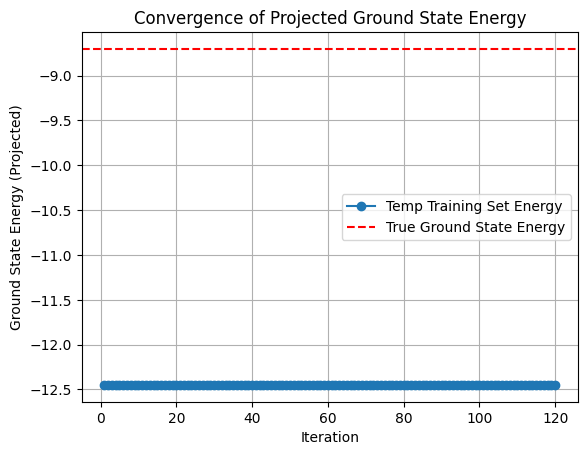

In [ ]:
import tenpy.models.tf_ising as spins
import tenpy.algorithms.dmrg as dmrg
import tenpy.networks.mps as mps
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1. Build an effective 1D representation for 2D TFIM via snake ordering.
# ------------------------------------------------------------------------------

# Here we set the number of sites to be 100 (for a 10x10 lattice)
model_params = {
    "L": 9,            # number of sites = Lx * Ly (here 10x10)
    "g": 0.5,            # transverse field strength (acting as -g * sigma^x)
    "J": 1,            # coupling strength (acting as -J * sigma^z sigma^z)
    "bc_MPS": "finite",
    "conserve": None     # disable conservation for simplicity
}

model = spins.TFIModel(model_params)

# Construct the 1D MPS from a product state. (Now, note that this 1D MPS represents a snake-ordered 2D system.)
psi = mps.MPS.from_product_state(model.lat.mps_sites(), ['up'] * model.lat.N_sites, bc="finite")
print("Number of sites in MPS (should be 100):", psi.L)

dmrg_params = {
    "mixer": True,
    "max_E_err": 1e-6,
    "chi_max": 100,
}
info = dmrg.run(psi, model, dmrg_params)
print("Ground state energy from DMRG:", info['E'])

# ------------------------------------------------------------------------------
# 2. Create the Original Training Set from MPS Sampling
# ------------------------------------------------------------------------------
unique_measurements = {}
num_samples = 2500
for _ in range(num_samples):
    psi_copy = psi.copy()
    psi_copy.canonical_form()
    sigmas, weight = psi_copy.sample_measurements(first_site=0, last_site=None, complex_amplitude=True)
    outcome = tuple(sigmas)
    if outcome not in unique_measurements or abs(weight) > abs(unique_measurements[outcome]):
        unique_measurements[outcome] = weight

sorted_measurements = sorted(unique_measurements.items(), key=lambda x: abs(x[1]), reverse=True)
top_measurements = sorted_measurements[:100]
print("Number of unique basis in original training set:", len(top_measurements))

initial_training_set = [np.array(basis) for basis, amp in top_measurements]
train_data = np.array(initial_training_set, dtype=np.float32)

# ------------------------------------------------------------------------------
# 3. Define a Simple RBM in NumPy (same as before)
# ------------------------------------------------------------------------------
class RBM:
    def __init__(self, n_visible, n_hidden):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = np.random.randn(n_visible, n_hidden) * 0.01
        self.a = np.zeros(n_visible)
        self.b = np.zeros(n_hidden)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def sample_hidden(self, v):
        prob_h = self.sigmoid(np.dot(v, self.W) + self.b)
        h = (np.random.rand(self.n_hidden) < prob_h).astype(np.float32)
        return h, prob_h
    
    def sample_visible(self, h):
        prob_v = self.sigmoid(np.dot(self.W, h) + self.a)
        v = (np.random.rand(self.n_visible) < prob_v).astype(np.float32)
        return v, prob_v

    def cd_step(self, v0, k=20):
        v = v0.copy()
        for _ in range(k):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def train(self, training_data, epochs=20, lr=0.01, k=20, minibatch_size=10):
        N = training_data.shape[0]
        for epoch in range(epochs):
            np.random.shuffle(training_data)
            for i in range(0, N, minibatch_size):
                batch = training_data[i:i+minibatch_size]
                pos_hidden_probs = self.sigmoid(np.dot(batch, self.W) + self.b)
                pos_assoc = np.dot(batch.T, pos_hidden_probs)
                v_neg = np.zeros_like(batch)
                neg_hidden_probs = np.zeros((batch.shape[0], self.n_hidden))
                for j in range(batch.shape[0]):
                    v_sample = self.cd_step(batch[j], k=k)
                    v_neg[j] = v_sample
                    neg_hidden_probs[j] = self.sigmoid(np.dot(v_sample, self.W) + self.b)
                neg_assoc = np.dot(v_neg.T, neg_hidden_probs)
                self.a += lr * np.mean(batch - v_neg, axis=0)
                self.b += lr * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)
                self.W += lr * ((pos_assoc - neg_assoc) / minibatch_size)
            print(f"RBM Epoch {epoch+1}/{epochs} completed.")

    def gibbs_sample(self, v_init, L=1):
        v = v_init.copy()
        for _ in range(L):
            h, _ = self.sample_hidden(v)
            v, _ = self.sample_visible(h)
        return v

    def sample(self, n_samples, L=1):
        samples = []
        for _ in range(n_samples):
            v_init = (np.random.rand(self.n_visible) < 0.5).astype(np.float32)
            v_sample = self.gibbs_sample(v_init, L=L)
            samples.append(v_sample)
        return np.array(samples)

# ------------------------------------------------------------------------------
# 4. Helper Functions for Training Set and Hamiltonian Projection
# ------------------------------------------------------------------------------

def snake_order_indices(Lx, Ly):
    indices = []
    for i in range(Lx):
        row = list(range(Ly))
        if i % 2 == 1:
            row = row[::-1]
        for j in row:
            indices.append((i, j))
    return indices

def compute_snake_neighbors(Lx, Ly):
    order = snake_order_indices(Lx, Ly)
    index_map = {order[i]: i for i in range(len(order))}
    neighbor_pairs = []
    for i in range(Lx):
        for j in range(Ly):
            current = (i, j)
            idx_current = index_map[current]
            if j + 1 < Ly:  # right neighbor in 2D
                neighbor_pairs.append((idx_current, index_map[(i, j+1)]))
            if i + 1 < Lx:  # down neighbor in 2D
                neighbor_pairs.append((idx_current, index_map[(i+1, j)]))
    return neighbor_pairs

def project_hamiltonian(basis_set, J, g):

    n_basis = len(basis_set)
    H = np.zeros((n_basis, n_basis))
    # Determine Lx and Ly from the length of the vector
    L_total = basis_set[0].shape[0]
    Lx = Ly = int(np.sqrt(L_total))
    # Compute the neighbor-pairs from snake ordering
    neighbors = compute_snake_neighbors(Lx, Ly)
    
    def diag_energy(v):
        E = 0.0
        for (i, j) in neighbors:
            E += (2*v[i]-1) * (2*v[j]-1)
        return -J * E

    # Set the diagonal elements using the 2D (snake) connectivity.
    for i in range(n_basis):
        H[i, i] = diag_energy(basis_set[i])
        
    # Off-diagonal terms: The transverse field acts on every site.
    # If two configurations differ by a single spin flip, the matrix element is -g.
    for i in range(n_basis):
        for j in range(n_basis):
            if i == j:
                continue
            diff = np.abs(basis_set[i] - basis_set[j])
            if np.sum(diff) == 1:
                H[i, j] = -g
    return H

def to_tuple(v):
    return tuple(v.astype(int))

# ------------------------------------------------------------------------------
# 5. Main Iterative Pipeline (Fully Update the Training Set)
# ------------------------------------------------------------------------------
def main_pipeline(data, num_iterations=5, rbm_epochs=20, rbm_lr=0.01, cd_k=20):
    # Hamiltonian parameters (consistent with model_params)
    J = 1.0
    g = 0.5  # Note: these g and J are here for building the projection; they should reflect the model.
    L = 9  # total sites = 10x10

    # Original training set from MPS sampling as list of tuples.
    training_set = [to_tuple(v) for v in data]
    
    gs_energies_temp = []
    gs_energies_updated = []
    
    # Instantiate a trained RBM (we reuse the same RBM across iterations)
    rbm = RBM(n_visible=L, n_hidden=216)

    for iteration in range(num_iterations):
        print(f"\nIteration {iteration+1}")
        
        # Train the RBM on the current training data
        rbm.train(data, epochs=rbm_epochs, lr=rbm_lr, k=cd_k, minibatch_size=5)
        
        # Sample new vectors from the trained RBM using Gibbs sampling with L=1
        new_samples = rbm.sample(n_samples=1400, L=1)
        
        # Filter out samples already in the current training set.
        current_set = set(training_set)
        new_unique_samples = []
        for v in new_samples:
            t = to_tuple(v)
            if t not in current_set:
                new_unique_samples.append(v)
        new_unique_samples = np.array(new_unique_samples)
        print("Number of new unique samples:", len(new_unique_samples))
        
        # Temporary training set: union of current training set and new unique samples.
        temp_training_set = list(current_set)
        for v in new_unique_samples:
            t = to_tuple(v)
            if t not in temp_training_set:
                temp_training_set.append(t)
        print("Temporary training set size:", len(temp_training_set))
        
        # Project the Hamiltonian onto the subspace spanned by the temporary training set and diagonalize.
        basis_vectors_temp = [np.array(v) for v in temp_training_set]
        H_proj_temp = project_hamiltonian(basis_vectors_temp, J, g)
        eigvals_temp, eigvecs_temp = np.linalg.eigh(H_proj_temp)
        gs_energy_temp = np.min(eigvals_temp)
        gs_energies_temp.append(gs_energy_temp)
        print("Projected ground state energy (temp set):", gs_energy_temp)
        

        gs_index = np.argmin(eigvals_temp)
        basis_with_weights = []
        for idx, v in enumerate(temp_training_set):
            weight_sq = np.abs(eigvecs_temp[idx, gs_index])**2
            basis_with_weights.append((v, weight_sq))
        basis_sorted = sorted(basis_with_weights, key=lambda x: x[1], reverse=True)
        n_current = len(current_set)
        
        if n_current < 280:
            m = int(np.ceil(1.01 * n_current))
            
        else:
             m = int(np.ceil(n_current))
            
        updated_training_set = [item[0] for item in basis_sorted[:m]]
        print("Updated training set size (new set):", len(updated_training_set))

        
        # Update training_set and data for next iteration.
        training_set = updated_training_set
        data = np.array([np.array(v) for v in training_set], dtype=np.float32)
    
    iterations = np.arange(1, num_iterations+1)
    plt.figure()
    plt.plot(iterations, gs_energies_temp, marker='o', label="Temp Training Set Energy")
    #plt.plot(iterations, gs_energies_updated, marker='s', label="Updated Training Set Energy")
    plt.axhline(y=info['E'], color='r', linestyle='--', label='True Ground State Energy')
    plt.xlabel("Iteration")
    plt.ylabel("Ground State Energy (Projected)")
    plt.title("Convergence of Projected Ground State Energy")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":

    main_pipeline(data=train_data, num_iterations=120, rbm_epochs=50, rbm_lr=0.01, cd_k=20)
